## PCA: Principal Component Analysis

## What we are going to learn
+ Motivation (Why)
+ Benefit
+ How (Maximize variance)
+ 1->k projection
+ code
+ scikit-learn

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data generation
num_data = 5000
mean = np.array([0, 0]) # zero-mean
cov = np.array([[3, 1.5], 
                  [1.5, 1]])

X = np.random.multivariate_normal(mean, cov, num_data)
X = np.asmatrix(X)

print(X.shape)

(5000, 2)


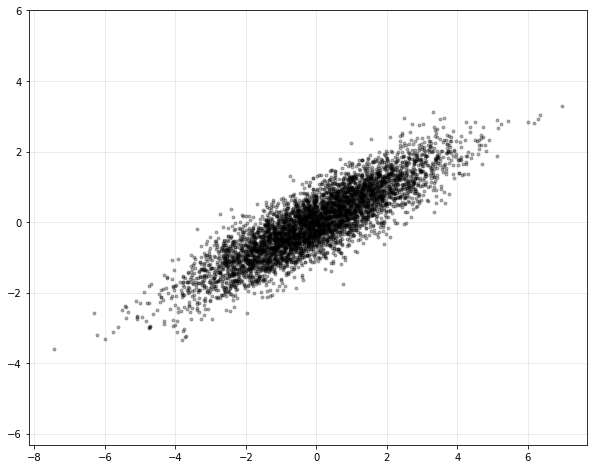

In [45]:
fig = plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'k.', alpha = 0.3)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

In [46]:
S = 1/(m-1)*X.T*X # 2*2 matrix
 
D, U = np.linalg.eig(S)

idx = np.argsort(-D) # argsort sorts in ascending order
D = D[idx]
U = U[:,idx]

print(D, '\n') # lamda1, lamda2 (eigen value)
print(U) # each column vector is u1, u2 (eigen vector coresponds to each eigen value)

[9.80427008 0.49326166] 

[[ 0.88126536 -0.4726218 ]
 [ 0.4726218   0.88126536]]


In [47]:
# for plotting u1
h = U[1,0]/U[0,0] # calculate slope
xp = np.arange(-6, 6, 0.1)
yp = h*xp

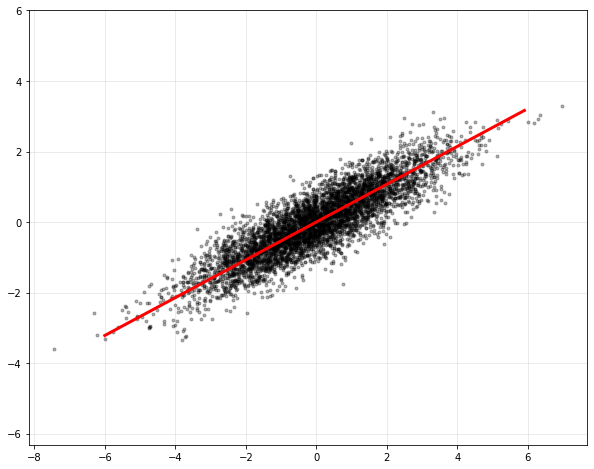

In [48]:
fig = plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'k.', alpha = 0.3)
plt.plot(xp, yp, 'r', linewidth = 3)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

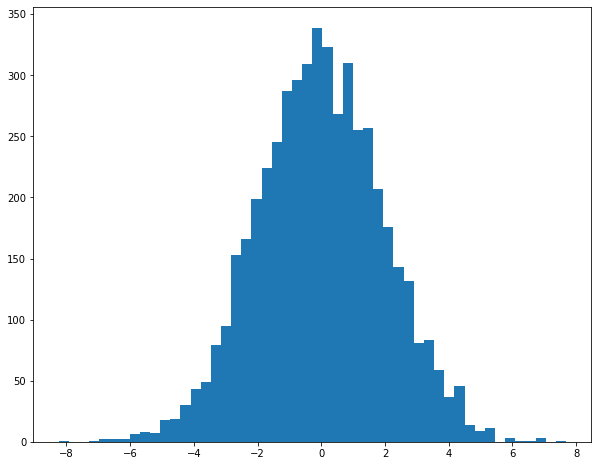

In [51]:
# projection onto u1(eigen vector)
Z = X*U[:,0]

plt.figure(figsize = (10, 8))
plt.hist(Z, bins=50)
plt.show()

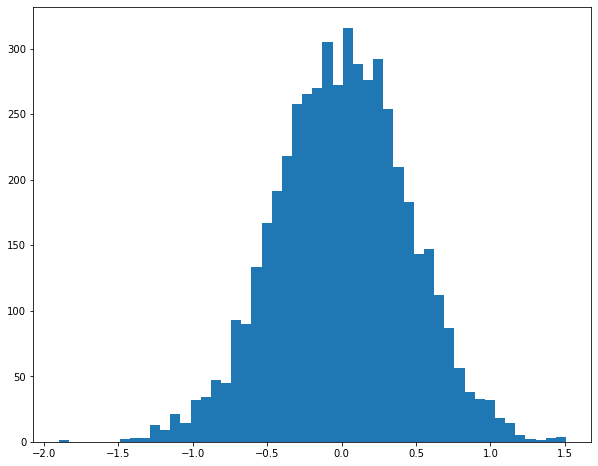

In [52]:
# projection onto u2(eigen vector)
Z = X*U[:,1]

plt.figure(figsize = (10, 8))
plt.hist(Z, bins=50)
plt.show()

## Scikit-learn

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1) 
pca.fit(X)

PCA(n_components=1)

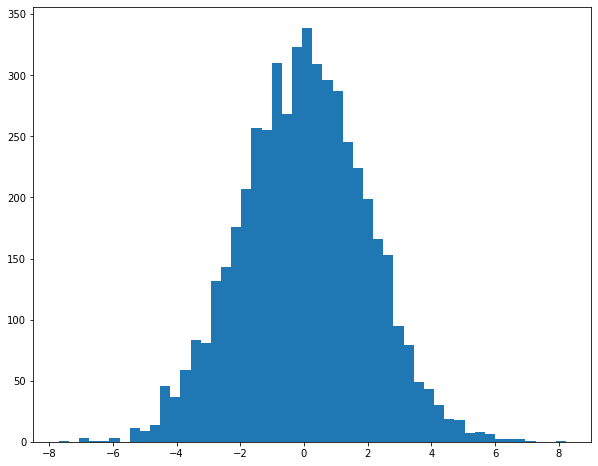

In [54]:
u = pca.transform(X)

plt.figure(figsize = (10, 8))
plt.hist(u, bins=50)
plt.show()